In [ ]:
#Setting up a virtual environment to avoid problems with new library upgrades
!conda create --name newenv python=3.12
!conda activate newenv
!conda install ipykernel
!python -m ipykernel install --user --name=newenv --display-name "Python (newenv)"


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from transformers import pipeline, AutoTokenizer
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
import scipy.stats as stats
import emoji
import re
import random
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

In [263]:
import sys
print(sys.version)

3.12.4 | packaged by Anaconda, Inc. | (main, Jun 18 2024, 15:03:56) [MSC v.1929 64 bit (AMD64)]


In [3]:
df = pd.read_csv('amazon.csv')

In [4]:
print(df.head())

   product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             ₹399   
1  Computers&Accessories|Accessories&Peripherals|...             ₹199   
2  Computers&Accessories|Accessories&Peripherals|...             ₹199   
3  Computers&Accessories|Accessories&Peripherals|...             ₹329   
4  Computers&Accessories|Accessories&Peripherals|...             ₹154   

  actual_price discount_percentage rating rating_count  \
0       ₹1,099                 64%    4.2       24,269   
1         ₹349                 43%  

In [5]:
df = df.drop_duplicates(subset = ['product_id'])

In [6]:
print(df[['product_id', 'product_link']][df.duplicated(subset = 'product_id') == True])

Empty DataFrame
Columns: [product_id, product_link]
Index: []


In [7]:
print(df.shape)

(1351, 16)


In [8]:
print(df.product_id.nunique())

1351


In [9]:
print(df.product_link.nunique())

1351


In [10]:
print(df.user_id.nunique())

1186


In [11]:
print(df.user_id[0])

AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBBSNLYT3ONILA,AHCTC6ULH4XB6YHDY6PCH2R772LQ,AGYHHIERNXKA6P5T7CZLXKVPT7IQ,AG4OGOFWXJZTQ2HKYIOCOY3KXF2Q,AENGU523SXMOS7JPDTW52PNNVWGQ,AEQJHCVTNINBS4FKTBGQRQTGTE5Q,AFC3FFC5PKFF5PMA52S3VCHOZ5FQ


In [12]:
print(df.category.nunique())

211


In [13]:
print(df.category.value_counts(normalize=True).head())

category
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables    0.119171
Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|Smartphones                 0.050333
Electronics|WearableTechnology|SmartWatches                                          0.045892
Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions                        0.044412
Electronics|Headphones,Earbuds&Accessories|Headphones|In-Ear                         0.037750
Name: proportion, dtype: float64


In [14]:
print(df.isna().sum())

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64


In [15]:
print(df[df.rating_count.isna()])

     product_id                                       product_name  \
282  B0B94JPY2N  Amazon Brand - Solimo 65W Fast Charging Braide...   
324  B0BQRJ3C47  REDTECH USB-C to Lightning Cable 3.3FT, [Apple...   

                                              category discounted_price  \
282  Computers&Accessories|Accessories&Peripherals|...             ₹199   
324  Computers&Accessories|Accessories&Peripherals|...             ₹249   

    actual_price discount_percentage rating rating_count  \
282         ₹999                 80%    3.0          NaN   
324         ₹999                 75%    5.0          NaN   

                                         about_product  \
282  USB C to C Cable: This cable has type C connec...   
324  💎[The Fastest Charge] - This iPhone USB C cabl...   

                          user_id    user_name      review_id  \
282  AE7CFHY23VAJT2FI4NZKKP6GS2UQ       Pranav   RUB7U91HVZ30   
324  AGJC5O5H5BBXWUV7WRIEIOOR3TVQ  Abdul Gafur  RQXD5SAMMPC6L   

           

In [16]:
#There's two missing values in the rating_count column (n° of user who left a rating for the product), the simplest solution is simply discarding the two rows. 

df = df.dropna()

In [17]:
print(df.isna().sum())

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64


In [18]:
print(df.dtypes)
#Each column is of type object including the numerical variables, this needs to be fixed

product_id             object
product_name           object
category               object
discounted_price       object
actual_price           object
discount_percentage    object
rating                 object
rating_count           object
about_product          object
user_id                object
user_name              object
review_id              object
review_title           object
review_content         object
img_link               object
product_link           object
dtype: object


In [19]:
print(df.rating[df.rating == '|'])
df.rating.loc[1279] = 0
print(df.rating[1279])

1279    |
Name: rating, dtype: object
0


C:\Users\armie\AppData\Local\Temp\ipykernel_12276\128703919.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.rating.loc[1279] = 0


In [20]:
df.rating = df.rating.astype(float)
print(df.rating.dtype)

float64


In [21]:
df.rating.loc[1279] = df.rating.median()
print(df.rating[1279])

4.1


C:\Users\armie\AppData\Local\Temp\ipykernel_12276\2498019222.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.rating.loc[1279] = df.rating.median()
C:\Users\armie\AppData\Local\Temp\ipykernel_12276\2498019222.py:1: SettingWithCopyWarni

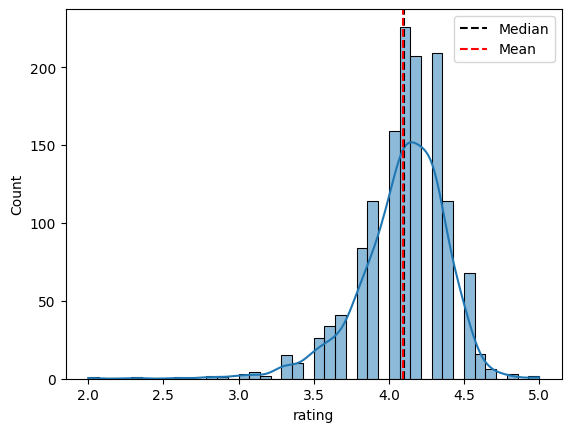

Shapiro p-val: 3.1987801368036147e-25


In [39]:
sns.histplot(df.rating, kde = True)
plt.axvline(x = df.rating.median(), color = 'k', linestyle = '--', label = 'Median')
plt.axvline(x = df.rating.mean(), color = 'r', linestyle = '--', label = 'Mean')
plt.legend()
plt.show()
plt.close()
shapiro_test = stats.shapiro(df.rating)
print(f'Shapiro p-val: {shapiro_test.pvalue}') #This tells us that the distribution is not normal

In [41]:
print(df.category.iloc[282])

Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions


In [43]:
#The category variable contains 211 unique values. Yet the category is a long string containing progressively smaller and more specific categories. Let's get the main ones

print(df.category[0].split('|')[0])

df['main_cat'] = df.category.map(lambda x : x.split('|')[0])
print(df[['product_name', 'category', 'main_cat']].head())

Computers&Accessories
                                        product_name  \
0  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  Sounce Fast Phone Charging Cable & Data Sync U...   
3  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category               main_cat  
0  Computers&Accessories|Accessories&Peripherals|...  Computers&Accessories  
1  Computers&Accessories|Accessories&Peripherals|...  Computers&Accessories  
2  Computers&Accessories|Accessories&Peripherals|...  Computers&Accessories  
3  Computers&Accessories|Accessories&Peripherals|...  Computers&Accessories  
4  Computers&Accessories|Accessories&Peripherals|...  Computers&Accessories  


In [45]:
print(df.main_cat.nunique())
print(df.main_cat.value_counts(normalize=True))

9
main_cat
Electronics              0.363232
Home&Kitchen             0.332098
Computers&Accessories    0.276501
OfficeProducts           0.022980
MusicalInstruments       0.001483
HomeImprovement          0.001483
Toys&Games               0.000741
Car&Motorbike            0.000741
Health&PersonalCare      0.000741
Name: proportion, dtype: float64


In [47]:
#The price columns have a coin symbol at the beginning which needs to be removed before it can be converted to float 
print(df.discounted_price[0][1:])
df.discounted_price = df.discounted_price.map(lambda x : x[1:])
print(df.discounted_price.head())

df.actual_price = df.actual_price.map(lambda x : x[1:])
print(df.actual_price.head())

399
0    399
1    199
2    199
3    329
4    154
Name: discounted_price, dtype: object
0    1,099
1      349
2    1,899
3      699
4      399
Name: actual_price, dtype: object


In [49]:
df.discounted_price = df.discounted_price.map(lambda x : x.replace(',', '')) 
df.discounted_price = df.discounted_price.astype(float)

In [51]:
df.actual_price = df.actual_price.map(lambda x : x.replace(',', '')) 
df.actual_price = df.actual_price.astype(float)

In [53]:
df.rating_count = df.rating_count.map(lambda x: x.replace(',', ''))
df.rating_count = df.rating_count.astype(float)

In [54]:
df.discount_percentage = df.discount_percentage.map(lambda x: x.replace('%',''))
print(df.discount_percentage.head())
df.discount_percentage = df.discount_percentage.astype(float)

0    64
1    43
2    90
3    53
4    61
Name: discount_percentage, dtype: object


In [57]:
print(df.dtypes)

product_id              object
product_name            object
category                object
discounted_price       float64
actual_price           float64
discount_percentage    float64
rating                 float64
rating_count           float64
about_product           object
user_id                 object
user_name               object
review_id               object
review_title            object
review_content          object
img_link                object
product_link            object
main_cat                object
dtype: object


In [58]:
print(df[['main_cat', 'actual_price']].sort_values(by = 'actual_price', ascending=False))

                   main_cat  actual_price
249             Electronics      139900.0
255             Electronics       85000.0
283             Electronics       79990.0
1354           Home&Kitchen       75990.0
568             Electronics       74999.0
...                     ...           ...
811          OfficeProducts          75.0
710   Computers&Accessories          59.0
616          OfficeProducts          50.0
975   Computers&Accessories          39.0
997   Computers&Accessories          39.0

[1349 rows x 2 columns]


In [61]:
print(df.groupby('main_cat')['actual_price'].mean().sort_values(ascending = False))

main_cat
Electronics              10418.083673
Home&Kitchen              4162.073661
Car&Motorbike             4000.000000
Health&PersonalCare       1900.000000
Computers&Accessories     1862.350188
MusicalInstruments        1347.000000
HomeImprovement            799.000000
OfficeProducts             397.193548
Toys&Games                 150.000000
Name: actual_price, dtype: float64


In [62]:
print(df.groupby('main_cat')['actual_price'].sum().sort_values(ascending = False))

main_cat
Electronics              5104861.00
Home&Kitchen             1864609.00
Computers&Accessories     694656.62
OfficeProducts             12313.00
Car&Motorbike               4000.00
MusicalInstruments          2694.00
Health&PersonalCare         1900.00
HomeImprovement             1598.00
Toys&Games                   150.00
Name: actual_price, dtype: float64


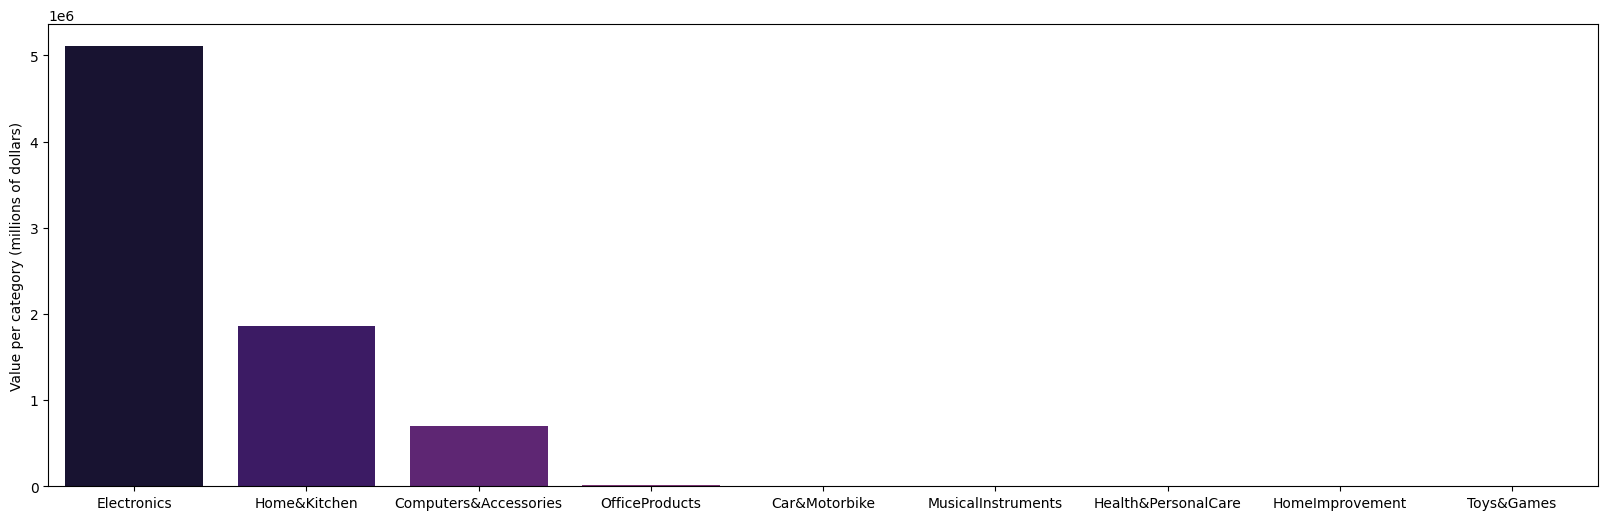

In [65]:
plt.figure(figsize=(20,6))
category_order = df.groupby('main_cat')['actual_price'].sum().sort_values(ascending = False).reset_index()
sns.barplot(x = 'main_cat', y = 'actual_price', data = category_order, hue = 'main_cat', palette = 'magma')
plt.xlabel('')
plt.ylabel('Value per category (millions of dollars)')
plt.show()
plt.close()

In [67]:
print(df.groupby('main_cat')['actual_price'].max().sort_values(ascending=False))

main_cat
Electronics              139900.0
Home&Kitchen              75990.0
Computers&Accessories     59890.0
Car&Motorbike              4000.0
OfficeProducts             2999.0
MusicalInstruments         1995.0
Health&PersonalCare        1900.0
HomeImprovement             999.0
Toys&Games                  150.0
Name: actual_price, dtype: float64


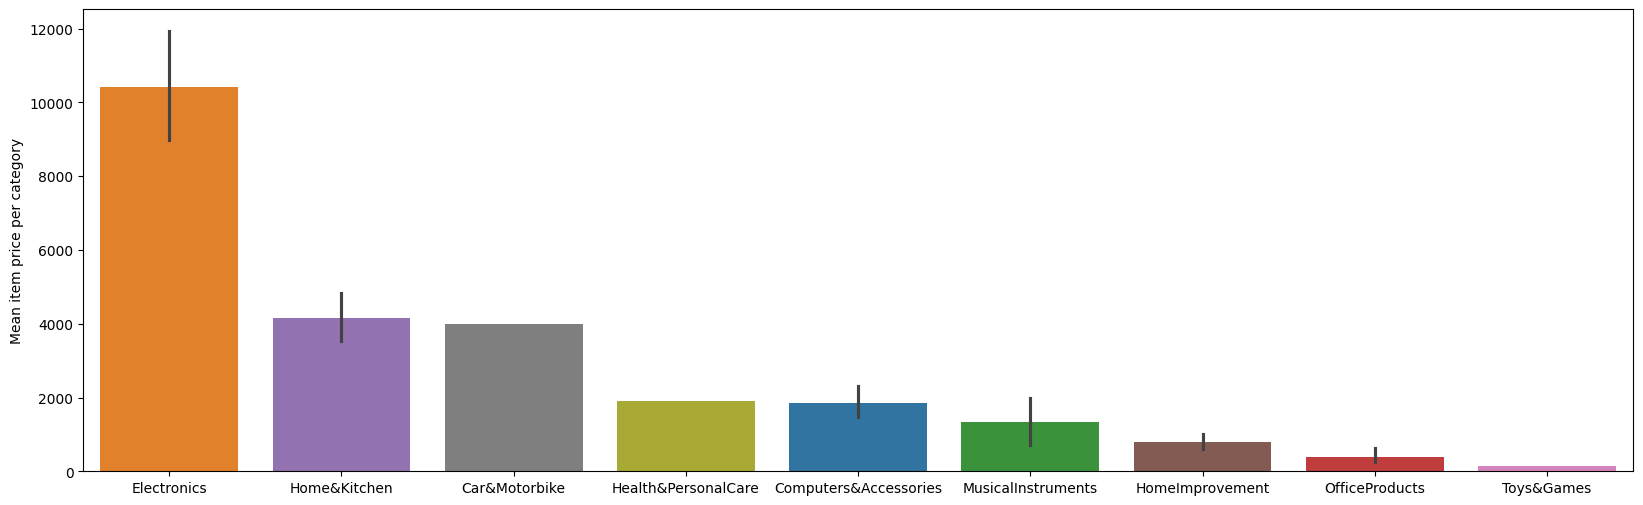

In [69]:
plt.figure(figsize=(20,6))
category_order = df.groupby('main_cat')['actual_price'].mean().sort_values(ascending=False).index
sns.barplot(y = df.actual_price, x = df.main_cat, hue = df.main_cat, order = category_order)
plt.xlabel('')
plt.ylabel('Mean item price per category')
plt.show()
plt.close()

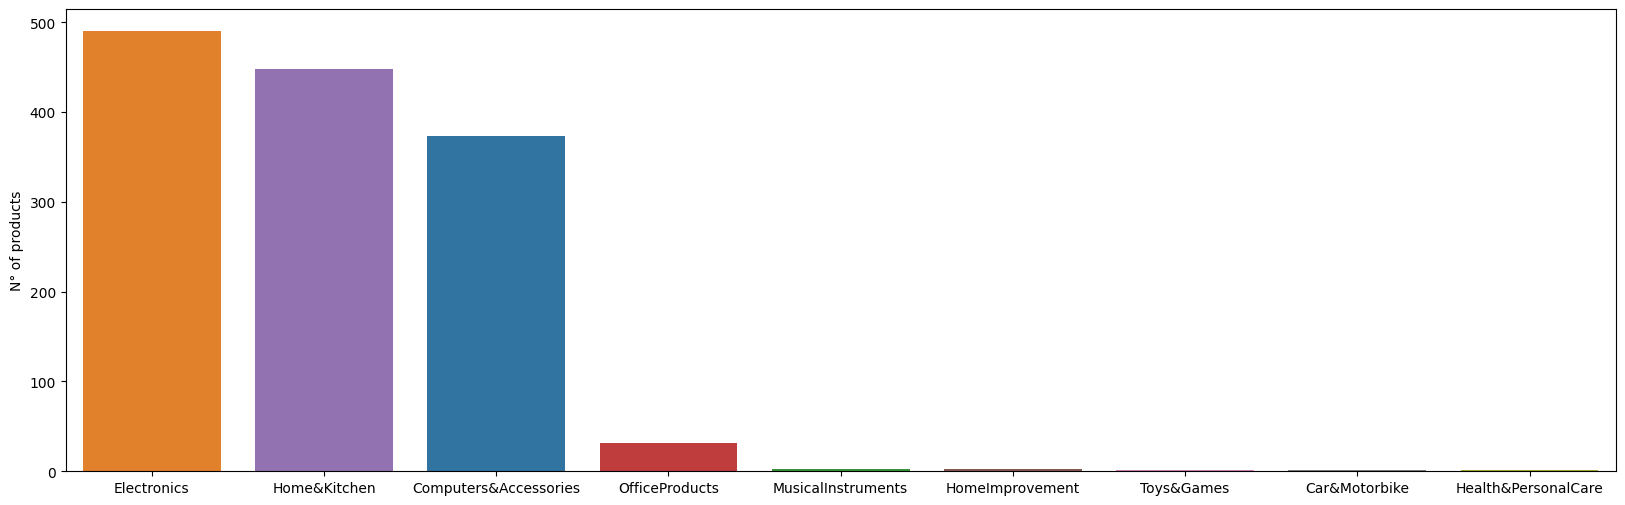

In [71]:
plt.figure(figsize=(20, 6))
cat_order = df.main_cat.value_counts()
sns.countplot(x = df.main_cat, hue = df.main_cat, order = cat_order.index)
plt.xlabel('')
plt.ylabel('N° of products')
plt.show()
plt.close()

The categories with most products are Electronics, Home&Kitchen and Computers&Accessories. The others have such low numbers to be negligible. 

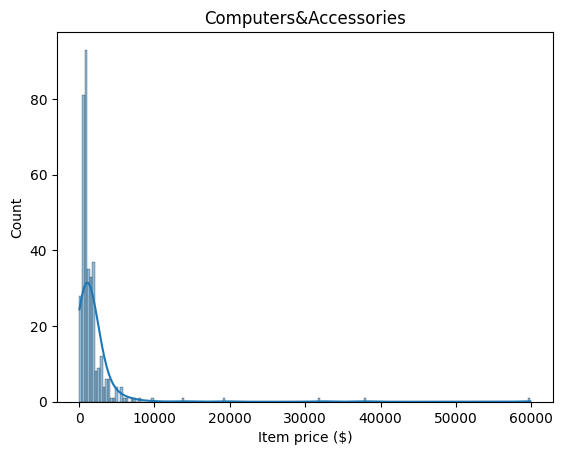

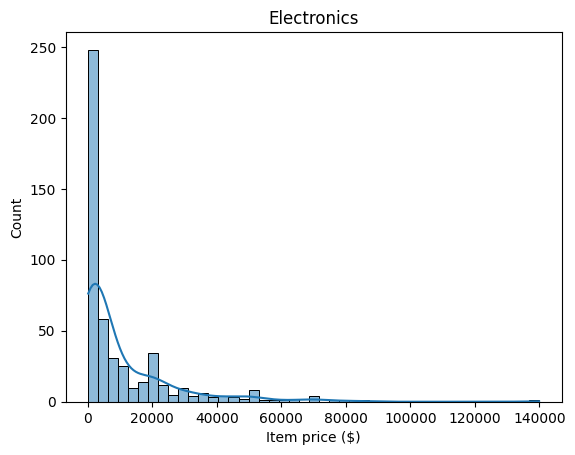

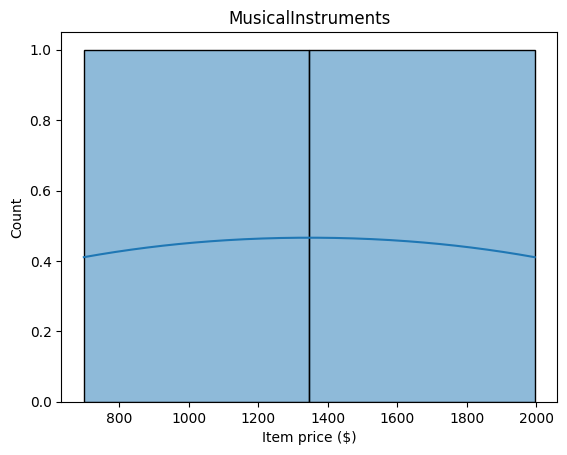

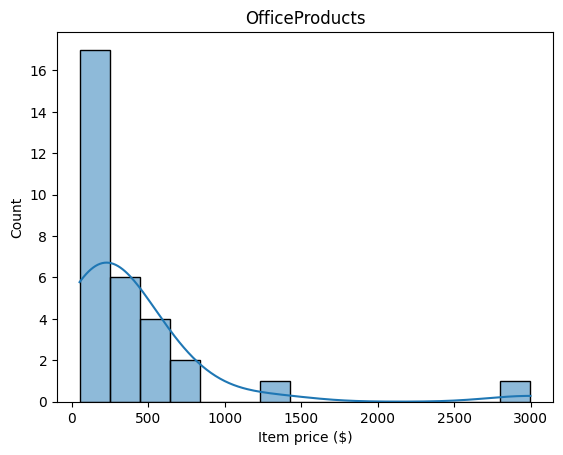

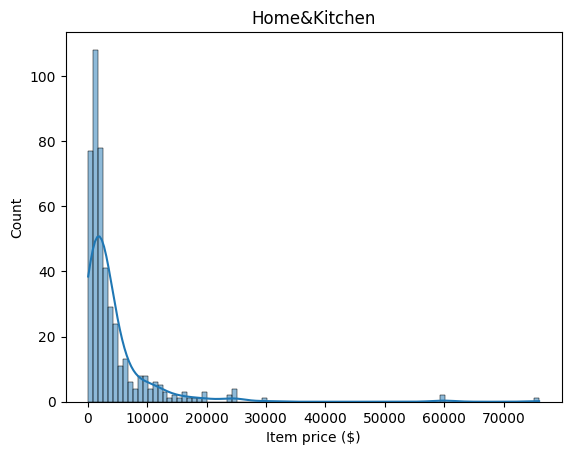

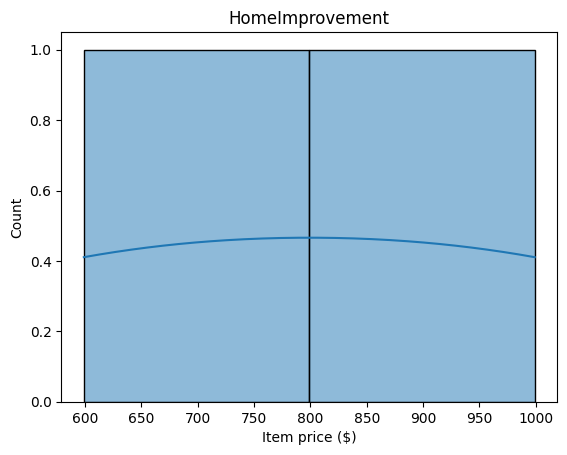

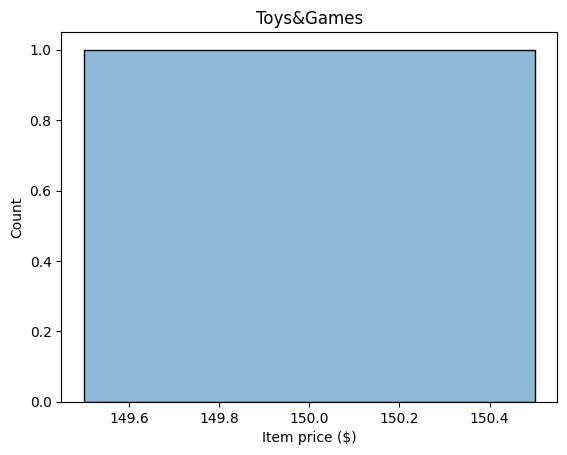

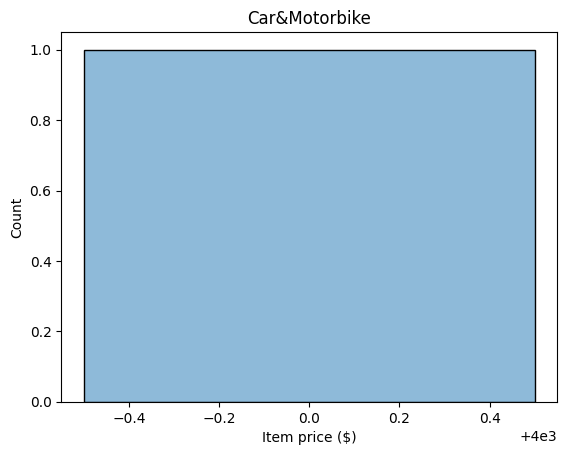

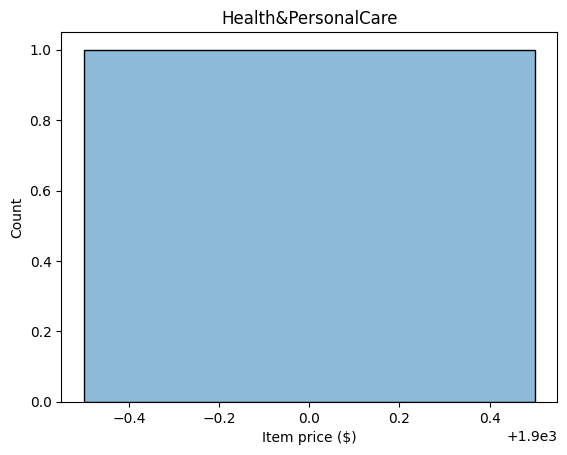

In [74]:

for cat in df.main_cat.unique():
    # print(cat)  
    sns.histplot(df.actual_price[df.main_cat == cat], kde = True)
    plt.xlabel('Item price ($)')
    plt.title(cat)
    plt.show()
    plt.close()

In [75]:
print(df.groupby('main_cat')['rating'].mean().sort_values(ascending = False))

main_cat
OfficeProducts           4.309677
Toys&Games               4.300000
HomeImprovement          4.250000
Computers&Accessories    4.154692
Electronics              4.077755
Home&Kitchen             4.040848
Health&PersonalCare      4.000000
MusicalInstruments       3.900000
Car&Motorbike            3.800000
Name: rating, dtype: float64


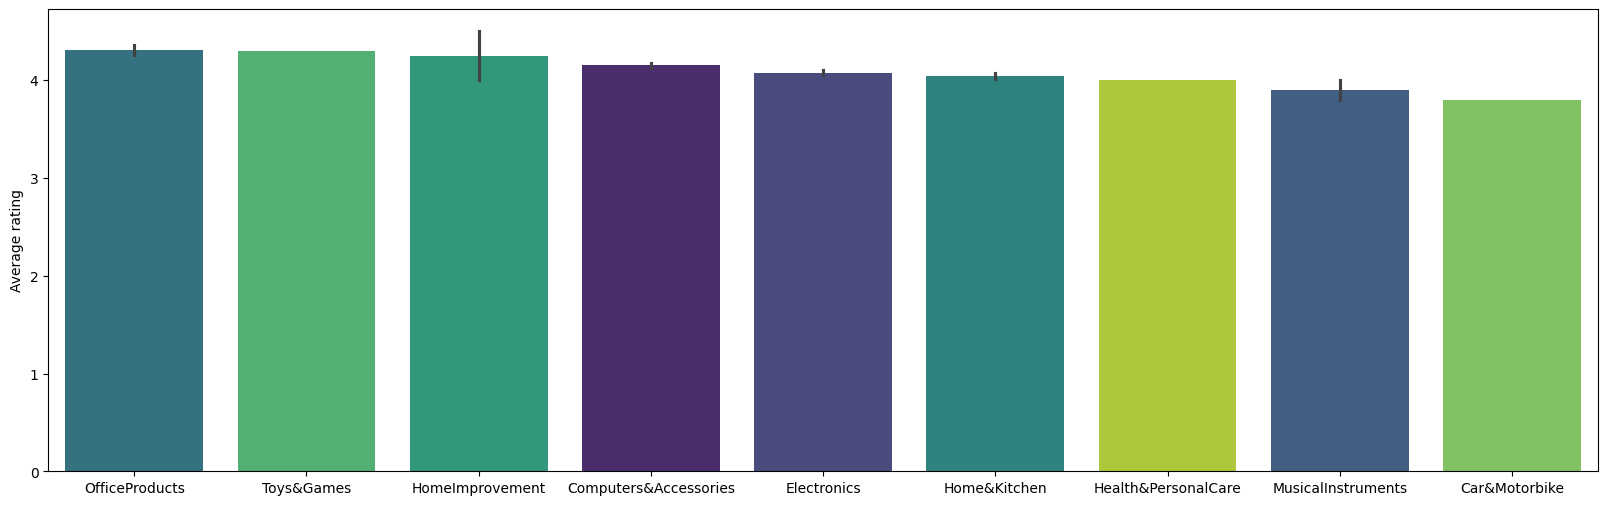

In [78]:
plt.figure(figsize=(20, 6))
order_rating = df.groupby('main_cat')['rating'].mean().sort_values(ascending = False)
sns.barplot(data = df, x = 'main_cat', y = 'rating', order = order_rating.index, hue = 'main_cat', palette = 'viridis')
plt.xlabel('')
plt.ylabel('Average rating')
plt.show()
plt.close()

In [79]:
print(df[['rating_count', 'main_cat']])

      rating_count               main_cat
0          24269.0  Computers&Accessories
1          43994.0  Computers&Accessories
2           7928.0  Computers&Accessories
3          94363.0  Computers&Accessories
4          16905.0  Computers&Accessories
...            ...                    ...
1460        1090.0           Home&Kitchen
1461        4118.0           Home&Kitchen
1462         468.0           Home&Kitchen
1463        8031.0           Home&Kitchen
1464        6987.0           Home&Kitchen

[1349 rows x 2 columns]


In [82]:
print(df.groupby('main_cat')['rating_count'].sum().sort_values(ascending = False))

main_cat
Electronics              14208406.0
Computers&Accessories     6335177.0
Home&Kitchen              2991069.0
OfficeProducts             149675.0
MusicalInstruments          88882.0
Toys&Games                  15867.0
HomeImprovement              8566.0
Health&PersonalCare          3663.0
Car&Motorbike                1118.0
Name: rating_count, dtype: float64


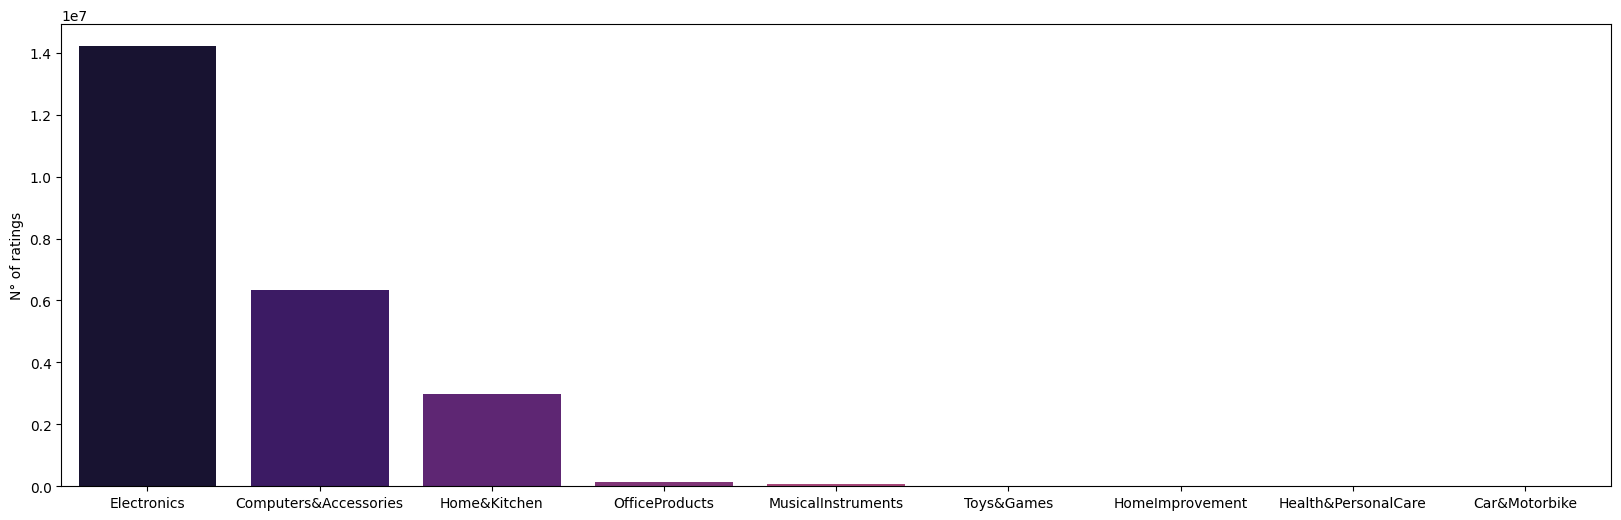

In [84]:
plt.figure(figsize=(20, 6))
rating_count_order = df.groupby('main_cat')['rating_count'].sum().sort_values(ascending = False).reset_index()
sns.barplot(data = rating_count_order, x = 'main_cat', y = 'rating_count', hue = 'main_cat', palette = 'magma')
plt.xlabel('')
plt.ylabel('N° of ratings')
plt.show()
plt.close()

In [86]:
print((df.groupby('main_cat')['rating_count'].sum()/df.groupby('main_cat')['product_id'].count()).reset_index())

                main_cat             0
0          Car&Motorbike   1118.000000
1  Computers&Accessories  16984.388740
2            Electronics  28996.746939
3    Health&PersonalCare   3663.000000
4           Home&Kitchen   6676.493304
5        HomeImprovement   4283.000000
6     MusicalInstruments  44441.000000
7         OfficeProducts   4828.225806
8             Toys&Games  15867.000000


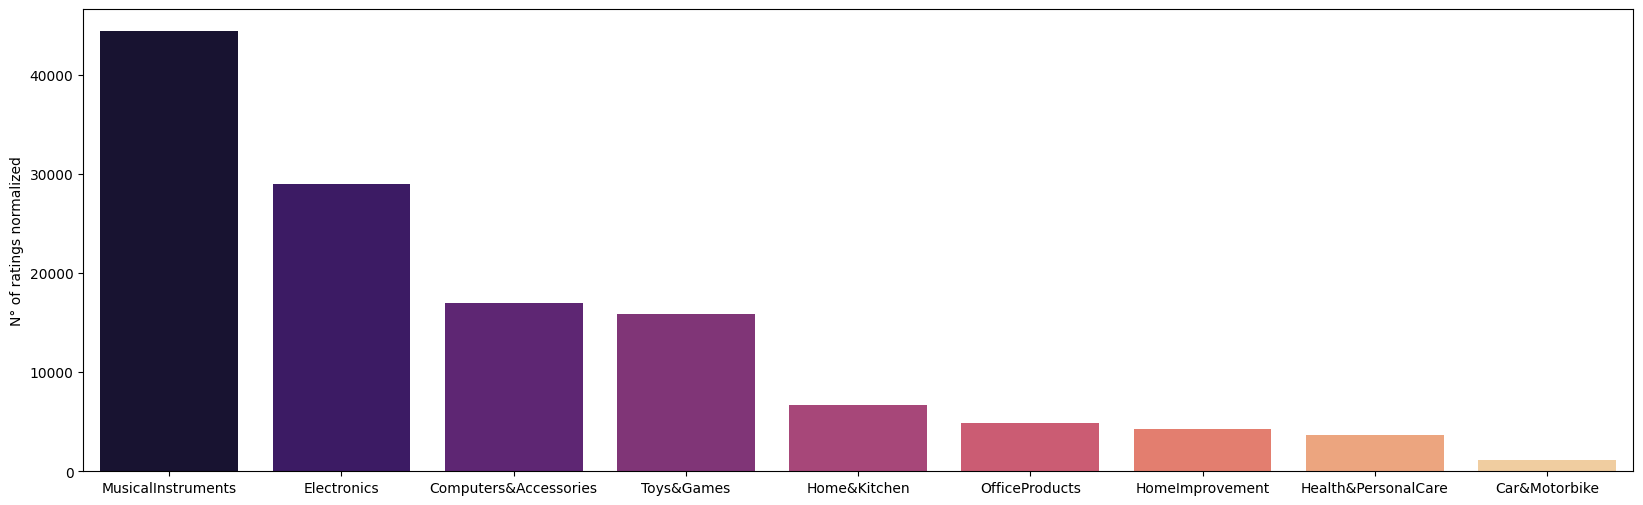

In [88]:
plt.figure(figsize=(20, 6))
rating_count_norm_order = (df.groupby('main_cat')['rating_count'].sum()/df.groupby('main_cat')['product_id'].count()).reset_index()
rating_count_norm_order.columns = ['main_cat', 'normalized']
rating_count_norm_order = rating_count_norm_order.sort_values(by = 'normalized', ascending= False)
sns.barplot(data = rating_count_norm_order, x = 'main_cat', y = 'normalized', hue = 'main_cat', palette = 'magma')
plt.xlabel('')
plt.ylabel('N° of ratings normalized')
plt.show()
plt.close()

In [90]:
print(df.groupby('main_cat')['discount_percentage'].median().sort_values(ascending = False))

main_cat
HomeImprovement          57.5
Computers&Accessories    56.0
Health&PersonalCare      53.0
Electronics              52.0
MusicalInstruments       46.0
Car&Motorbike            42.0
Home&Kitchen             41.5
OfficeProducts            5.0
Toys&Games                0.0
Name: discount_percentage, dtype: float64


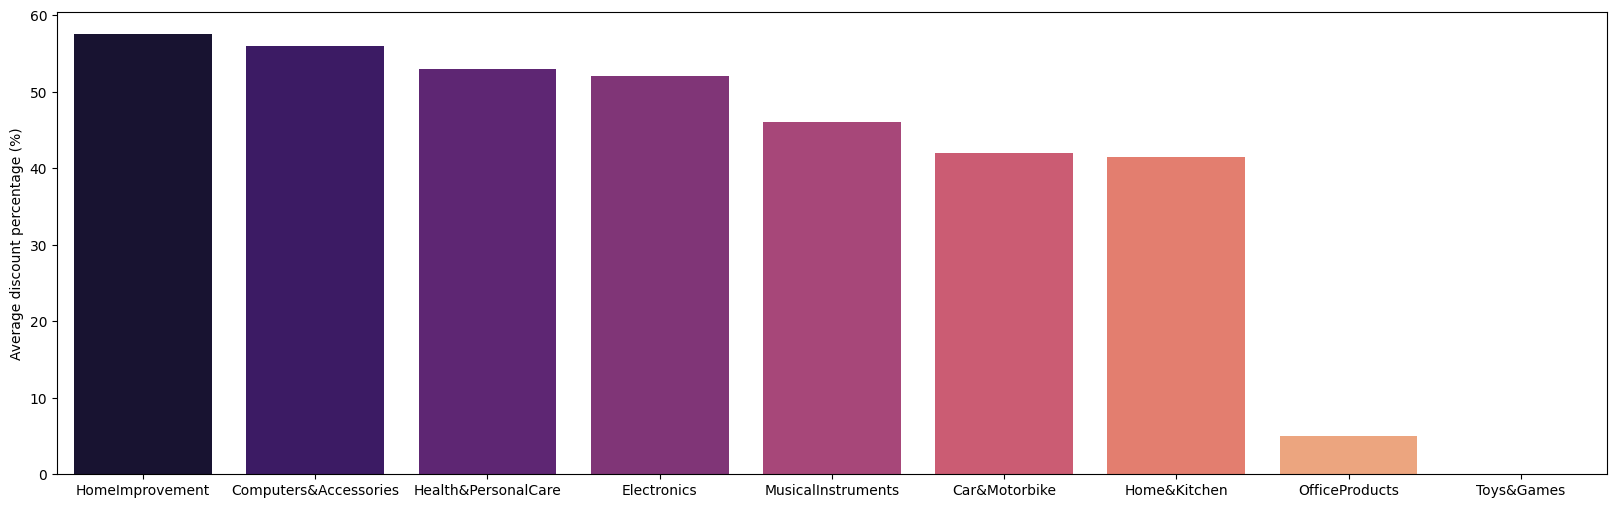

In [92]:
plt.figure(figsize=(20, 6))
discount_order = df.groupby('main_cat')['discount_percentage'].median().sort_values(ascending = False).reset_index()
sns.barplot(data = discount_order, x = 'main_cat', y = 'discount_percentage', hue = 'main_cat', palette = 'magma')
plt.xlabel('')
plt.ylabel('Average discount percentage (%)')
plt.show()
plt.close()

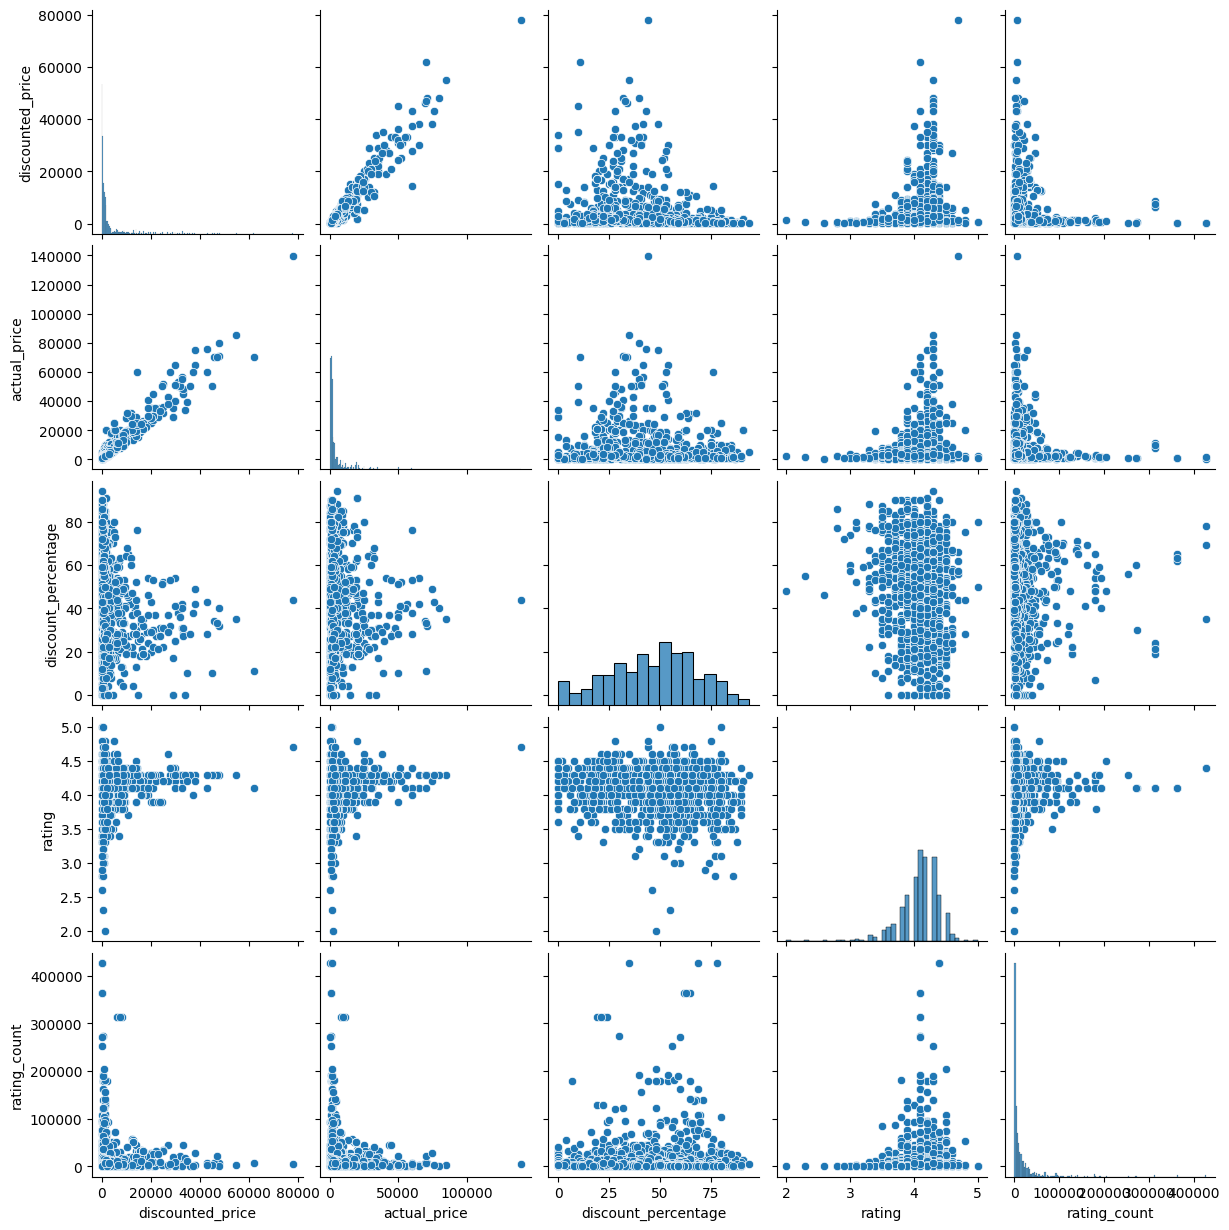

<function matplotlib.pyplot.close(fig: "None | int | str | Figure | Literal['all']" = None) -> 'None'>

In [94]:
sns.pairplot(df)
plt.show()
plt.close

There's an obvious correlation between the actual price and the discounted price but other than that no linear relationships. 

I will use now a Hugging Face pre-trained transformer to analyze the reviews of the products and get a sentiment output. 

In [98]:
df_sentiment = df[['product_id', 'review_content']]

In [105]:
def remove_emojis_using_library(text):
    return emoji.replace_emoji(text, '')

df_sentiment.loc[:, 'review_content'] = df_sentiment.review_content.apply(remove_emojis_using_library)

In [109]:
def clean_text(text):
     text = re.sub(r'https?://\S+|www\.\S+', '', text)
     return text

df_sentiment.loc[:, 'review_content'] = df_sentiment.review_content.apply(clean_text)

In [111]:
def remove_non_ascii(text):
    # Remove non-ASCII characters
    cleaned_text = re.sub(r'[^\x00-\x7F]+', '', text)
    return cleaned_text.strip()

df_sentiment.loc[:, 'review_content'] = df_sentiment.review_content.apply(remove_non_ascii)

In [113]:
train_data, test_data = train_test_split(df_sentiment, test_size = 0.2, random_state=42)
print(train_data.review_content[1430])

My review of using new Vacuum Mop Pro 2 for 3 days...1. The product is a bit tricky to setup with the app and you have to follow YouTube videos to get it setup. I wish Xiaomi provides video tutorial links in their user manuals. They don't mention it but we need Bluetooth and WiFi connection to be setup, for the app and robot  to work together. This tip is missing in user manual.2. WiFi connectivity does get lost sometimes but that is because my router is far from certain places in my house. That time the robot needs to be brought back to the WiFi range. 5GHz connection does not work with this model.3. The robot takes anywhere between 40-60 minutes to completely vaccum my 800 sq. ft house. Battery life is really good in the new model. 50% or more is still left after one complete sweep or mop cycle of my house. Charging is also not bad. It took 1.5 hrs for it to charge full 100% the first time.4. Couple of times it got confused in a specific area in my house and I had to reset the entire

In [117]:
i = random.choice(train_data.index)
print(i, train_data.review_content[i]) 

1296 Product works very well, easy to use i recommend to this product shakti s5 to all,To noise!,vary good washer, product work vary well ,go for it,Paisa vasool,Awesome Car Washer for Domestic use. Good Pressure for superior cleaning. But Inlet pipe should have more length than it has.,Good pressure washer and easy to use , i think inlet pipe need to be more long other wise all good,Pressure is very good but mtr shows 115bar,Used this product for wash my roof as well as to wash my car.  Product is very good with low noise and good pressure. Recommend to have this product for personal use to wash your Car, Floor, Roof etc


In [119]:
sentiment_pipeline = pipeline('sentiment-analysis', model = 'cardiffnlp/twitter-roberta-base-sentiment')

tokenizer = AutoTokenizer.from_pretrained('cardiffnlp/twitter-roberta-base-sentiment')

def truncate_text(text, max_length = 510):
    tokens = tokenizer.tokenize(text)
    if len(tokens) <= max_length:
        return text  # Return original if already within length
    
    # Estimate safe cutoff without breaking words arbitrarily
    words = text.split()
    truncated_text = ""
    for word in words:
        if len(tokenizer.tokenize(truncated_text + word)) > max_length:
            break
        truncated_text += (word + " ")
    
    return truncated_text.strip()

# i = random.choice(train_data.index)
# truncated_text = truncate_text(train_data.review_content[i])
# print(i, truncated_text)
# result = sentiment_pipeline(truncated_text)
# print(result)


def sentiment_analysis(texts, tokenizer, sentiment_pipeline):
    results = []
    for text in texts:
        try:
            # Truncate each text to prevent runtime errors
            truncated_text = truncate_text(text)
            # Analyze sentiment
            result = sentiment_pipeline(truncated_text)
            results.append(result)
        except Exception as e:
            print("Error processing text:", e)
            results.append(None)
    return results

results = sentiment_analysis(train_data['review_content'].tolist(), tokenizer, sentiment_pipeline)


In [121]:
train_data['sentiment'] = [result[0]['label'] for result in results]
train_data['confidence'] = [result[0]['score'] for result in results]
dict_label = {'LABEL_0' : 'negative', 'LABEL_1' : 'neutral', 'LABEL_2' : 'positive'}
train_data.sentiment = train_data.sentiment.map(dict_label)
# i = random.choice(train_data.index)
# print(train_data.review_content[i])
# print(train_data.sentiment[i])
# print(train_data.confidence[i])

In [123]:
results = sentiment_analysis(df_sentiment['review_content'].tolist(), tokenizer, sentiment_pipeline)


In [ ]:
df_sentiment['sentiment'] = [result[0]['label'] for result in results]
df_sentiment['confidence'] = [result[0]['score'] for result in results]
dict_label = {'LABEL_0' : 'negative', 'LABEL_1' : 'neutral', 'LABEL_2' : 'positive'}
df_sentiment.sentiment = df_sentiment.sentiment.map(dict_label)



In [129]:
print(df_sentiment.head())

   product_id                                     review_content sentiment  \
0  B07JW9H4J1  Looks durable Charging is fine tooNo complains...  positive   
1  B098NS6PVG  I ordered this cable to connect my phone to An...  positive   
2  B096MSW6CT  Not quite durable and sturdy, good, nice produ...  positive   
3  B08HDJ86NZ  Good product,long wire,Charges good,Nice,I bou...  positive   
4  B08CF3B7N1  Bought this instead of original apple, does th...  positive   

   confidence  
0    0.918900  
1    0.829337  
2    0.945529  
3    0.897702  
4    0.618464  


After sentiment analysis, I can proceed to keyword extraction to identify strengths and weaknesses of each product.

In [169]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\armie\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\armie\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\armie\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\armie\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [150]:
def get_wordnet_pos(treebank_tag):
    """Converts treebank tags to wordnet tags."""
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # Default to noun if no match

def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    word_pos_tags = pos_tag(nltk.word_tokenize(text))
    lemmatized_words = [lemmatizer.lemmatize(word, get_wordnet_pos(pos_tag)) for word, pos_tag in word_pos_tags]
    return ' '.join(lemmatized_words)

lemmatized_reviews = []
for row in df_sentiment.review_content:
    lemmatized_reviews.append(lemmatize_text(row))


In [151]:
print(df_sentiment.review_content[0])
print(lemmatized_reviews[0])

Looks durable Charging is fine tooNo complains,Charging is really fast, good product.,Till now satisfied with the quality.,This is a good product . The charging speed is slower than the original iPhone cable,Good quality, would recommend, had worked well till date and was having no issue.Cable is also sturdy enough...Have asked for replacement and company is doing the same...,Value for money
Looks durable Charging be fine tooNo complains , Charging be really fast , good product. , Till now satisfy with the quality. , This be a good product . The charge speed be slow than the original iPhone cable , Good quality , would recommend , have work well till date and be have no issue.Cable be also sturdy enough ... Have ask for replacement and company be do the same ... , Value for money


In [175]:
from rake_nltk import Rake

rake = Rake()
rake.extract_keywords_from_text(lemmatized_reviews[0])
key_phrases = rake.get_ranked_phrases_with_scores()  # returns a list of (score, phrase)
print(key_phrases[:10])  # top 10 phrases


[(14.5, 'work well till date'), (14.5, 'also sturdy enough ...'), (9.0, 'fine toono complains'), (8.0, 'original iphone cable'), (8.0, 'looks durable charging'), (4.0, 'would recommend'), (4.0, 'really fast'), (4.0, 'good product'), (4.0, 'good product'), (4.0, 'charge speed')]


In [236]:
rake = Rake()
sentiment_pipeline = pipeline('sentiment-analysis', model = 'cardiffnlp/twitter-roberta-base-sentiment')

def analyze_keywords(text):
    rake.extract_keywords_from_text(text)
    top_10 = rake.get_ranked_phrases()[:10]
    pos = []
    neg = []
    for keyword in top_10: 
        sentiment = sentiment_pipeline(keyword)
        if sentiment[0]['label'] == 'LABEL_2':
            pos.append(keyword)
        elif sentiment[0]['label'] == 'LABEL_0':
            neg.append(keyword)
    return pos, neg


In [ ]:
df_sentiment['strengths'], df_sentiment['weaknesses'] = zip(*df_sentiment.review_content.apply(analyze_keywords))

In [ ]:
print(df_sentiment.head())

In [252]:
i = random.choice(df_sentiment.index)
results = [analyze_keywords(df_sentiment.review_content[i])]
strengths, weaknesses = zip(*results)
print(df_sentiment.review_content[i])
print(strengths)
print(weaknesses)

Regarding rate I liked very much and reasonable.  Regarding the product Acer Company is manufacturing Computer Monitor and are best in quality.  So that, I prefer this company in buying TV,Its been 1 and half month using this product and have no complaint regarding the product some of its plus points are.1. Picture quality is good with clear sound quality2. We can easily connect any pan drive or otg to this Tv and access your content in tv.And Points in which it need improvement:1. Its does not support some audio format that.2. If we connect smartphone through OTG to TV it doesn't support the same3. Also we always have to use TV remote to start the TV. It doesn't start automatically when we on the swith, we have to press power button on remote each time to start this TV.Overall a very good product.,Picture quality is very good ,Bought this TV on amazon sale, value for money at this price, the picture and sound quality was okay, not that bad. If you want to buy a 32'' TV at an affordabl